In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Eigendecomposition of a covariance matrix

In [12]:
# Covariance
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# Covariance matrix
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

# Calculate covariance matrix 
cov_mat(X.T) # (or with np.cov(X.T))

array([[ 0.95054871, -0.04305937],
       [-0.04305937,  1.01848353]])

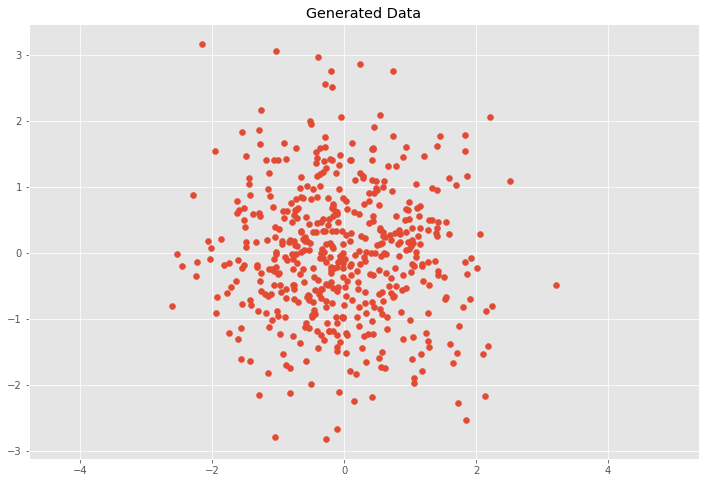

In [11]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Normal distributed x and y vector with mean 0 and standard deviation 1
x = np.random.normal(0, 1, 500)
y = np.random.normal(0, 1, 500)
X = np.vstack((x, y)).T

plt.scatter(X[:, 0], X[:, 1])
plt.title('Generated Data')
plt.axis('equal');




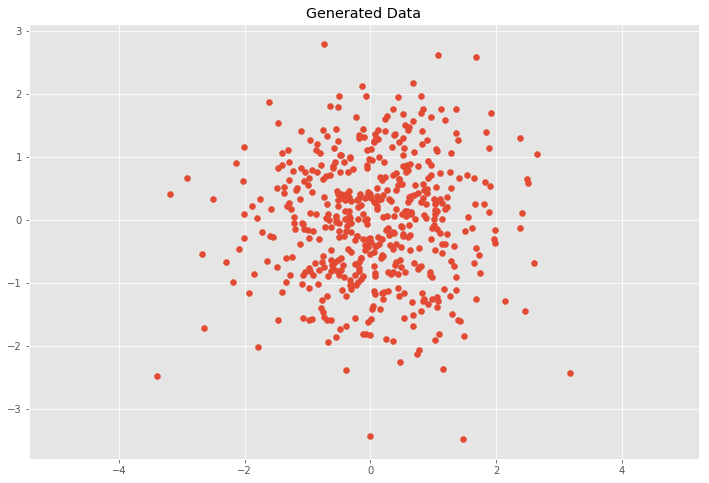

In [3]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Normal distributed x and y vector with mean 0 and standard deviation 1
x = np.random.normal(0, 1, 500)
y = np.random.normal(0, 1, 500)
X = np.vstack((x, y)).T

plt.scatter(X[:, 0], X[:, 1])
plt.title('Generated Data')
plt.axis('equal');

This case would mean that x and y are independent (or uncorrelated) and the covariance matrix 
$$S=\begin{bmatrix} \sigma_x^2  & 0 \\ 0 & \sigma_y^2  \end{bmatrix}$$

In [7]:
# Covariance
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# Covariance matrix
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

# Calculate covariance matrix 
cov_mat(X.T) # (or with np.cov(X.T))

array([[0.98566378, 0.0315313 ],
       [0.0315313 , 0.98012482]])

Which approximatelly gives us our expected covariance matrix with variances 
$$\sigma_x^2= \sigma_y^2=1$$

## Linear Transformations of the Data Set
Next, we will look at how transformations affect our data and the covariance matrix C
. We will transform our data with the following scaling matrix.
$$S=\begin{bmatrix} s_x^2  & 0 \\ 0 & s_y^2  \end{bmatrix}$$

where the transformation simply scales the x and y components by multiplying them by  s x and  s y
 respectively. What we expect is that the covariance matrix  C  of our transformed data set will simply be
 
 $$C=\begin{bmatrix} (s_x\sigma_x)^2  & 0 \\ 0 & (s_x\sigma_y)^2  \end{bmatrix}$$

array([[ 0.48297525,  0.07504449],
       [ 0.07504449, 11.33024287]])

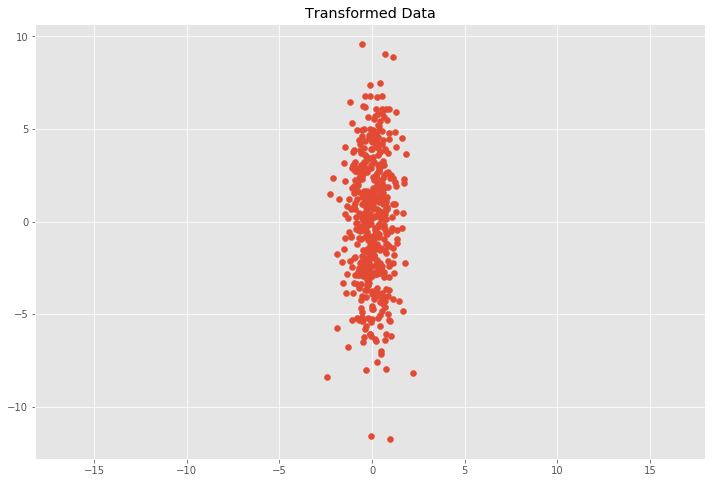

In [8]:
# Center the matrix at the origin
X = X - np.mean(X, 0)

# Scaling matrix
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# Apply scaling matrix to X
Y = X.dot(Scale)

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Transformed Data')
plt.axis('equal')

# Calculate covariance matrix
cov_mat(Y.T)

We can see that this does in fact approximately match our expectation with $0.7^2=49$ and $3.4^2=11.56$ for $(s_x\sigma_x)^2$ and $(s_x\sigma_y)^2$.This relation holds when the data is scaled in  x and  y direction, but it gets more involved for other linear transformations.

Now we will apply a linear transformation in the form of a transformation matrix  $T$ to the data set which will be composed of a two dimensional rotation matrix  $R$ and the previous scaling matrix  $S$ as follows

where the rotation matrix $R$ is given by : 
 $$R=\begin{bmatrix} cos(\omega)  & -sin(\omega) \\ sin(\omega) &  cos(\omega)  \end{bmatrix}$$

where  $\omega$ is the rotation angle. The transformed data is then calculated by  $Y=TX$ or $Y=RSX$


array([[ 5.15239476, -5.37146127],
       [-5.37146127,  6.66082336]])

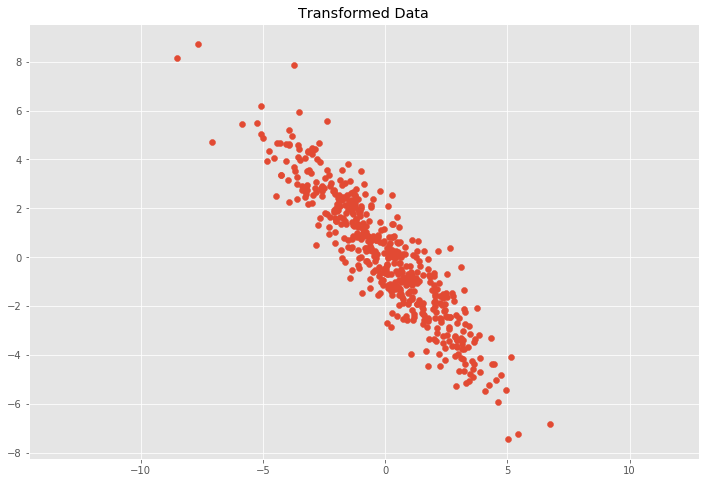

In [6]:
# Scaling matrix
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# Rotation matrix
theta = 0.77*np.pi
c, s = np.cos(theta), np.sin(theta)
Rot = np.array([[c, -s], [s, c]])

# Transformation matrix
T = Scale.dot(Rot)

# Apply transformation matrix to X
Y = X.dot(T)

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Transformed Data')
plt.axis('equal');

# Calculate covariance matrix
cov_mat(Y.T)

# Eigen Decomposition of the Covariance Matrix

### Eigen Decomposition is one connection between a linear transformation and the covariance matrix. An eigenvector is a vector whose direction remains unchanged when a linear transformation is applied to it. It can be expressed as
# $$ Av=\lambda v $$
where $v$ is is an eigenvector of $A$ and $\lambda$ is the corresponding eigenvalue.If we put all eigenvectors into the columns of a Matrix $V$ and all eingvalues as as the entries of a diagonal matrix $L$ we can write for our covariance matrix $C$
the following equation $CV=VL$ where the covariance matrix can be represented as
# $$C=VLV^{-1}$$
 The eigenvectors are unit vectors representing the direction of the largest variance of the data, while the eigenvalues represent the magnitude of this variance in the corresponding directions. This means $V$  represents a rotation matrix and $L^-1$ represents a scaling matrix. From this equation, we can represent the covariance matrix $C$  as
 ### $$C=RSSR^{-1} $$ 
 because $T^T=(RS)^T=S^TR^T=SR^{-1}$ due to the properties $R^{-1}=R^{T}$ sice $R$ is orthogonal and $S+S^T$ $S$ is s a diagonal matrix. This enables us to calculate the covariance matrix from a linear transformation. In order to calculate the linear transformation of the covariance matrix, one must calculate the eigenvectors and eigenvectors from the covariance matrix 
$C$ . This can be done by calculating
  $$ T= VL^-{1}$$
  where $V$ is the previous matrix where the columns are the eigenvectors of  $C$ and  $L$ is the previous diagonal matrix consisting of the corresponding eigenvalues. The transformation matrix can be also computed by the Cholesky decomposition with 
 $X+L^{-1}(X-X')$ where L is is the Cholesky factor of $C=LL^T$

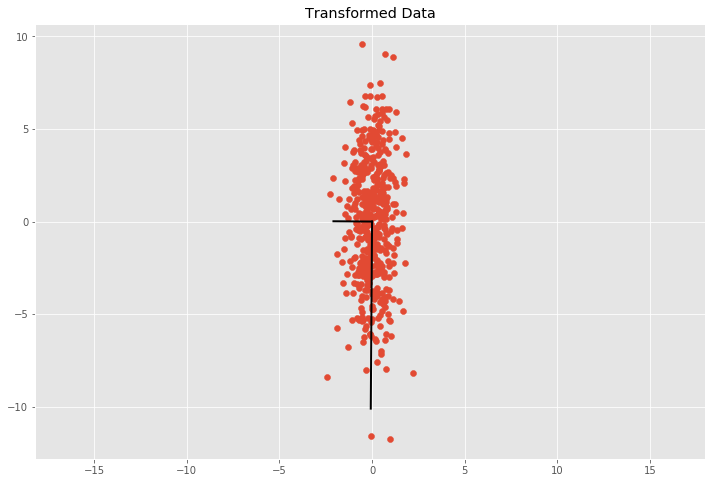

In [9]:
C = cov_mat(Y.T)
eVe, eVa = np.linalg.eig(C)

plt.scatter(Y[:, 0], Y[:, 1])
for e, v in zip(eVe, eVa.T):
    plt.plot([0, 3*np.sqrt(e)*v[0]], [0, 3*np.sqrt(e)*v[1]], 'k-', lw=2)
plt.title('Transformed Data')
plt.axis('equal');

We can now get from the covariance the transformation matrix  $T$ and we can use the inverse of  $T$
 to remove correlation (whiten) the data.
 

array([[ 1.00000000e+00, -2.13590001e-17],
       [-2.13590001e-17,  1.00000000e+00]])

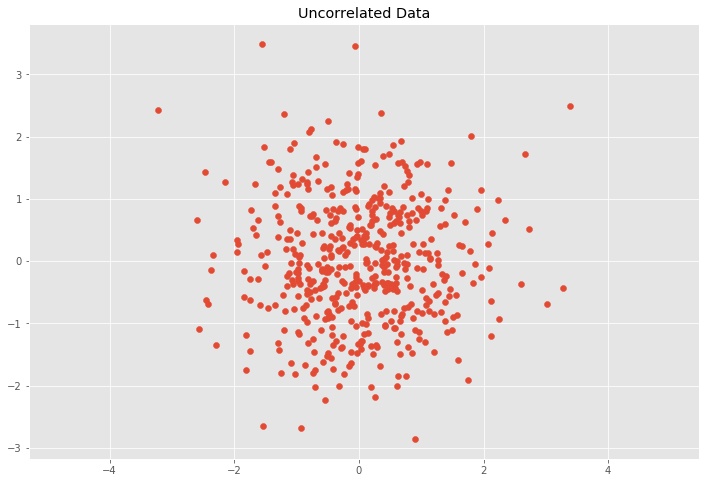

In [10]:
C = cov_mat(Y.T)

# Calculate eigenvalues
eVa, eVe = np.linalg.eig(C)

# Calculate transformation matrix from eigen decomposition
R, S = eVe, np.diag(np.sqrt(eVa))
T = R.dot(S).T

# Transform data with inverse transformation matrix T^-1
Z = Y.dot(np.linalg.inv(T))

plt.scatter(Z[:, 0], Z[:, 1])
plt.title('Uncorrelated Data')
plt.axis('equal');

# Covariance matrix of the uncorrelated data
cov_mat(Z.T)

An interesting use of the covariance matrix is in the Mahalanobis distance, which is used when measuring multivariate distances with covariance. It does that by calculating the uncorrelated distance between a point 
x
 to a multivariate normal distribution with the following formula

This leads to the question of how to decompose the covariance matrix $C$ into a rotation matrix $R$ and a scaling matrix  $S$


External LINKS: <br>
[1] https://datascienceplus.com/understanding-the-covariance-matrix/